<a href="https://colab.research.google.com/github/Ragumaan/wheat_production_accuracy/blob/main/Wheat_production_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

# Replace 'your_dataset.csv' with the actual file path of your dataset
dataset_file_path = '/content/project1.csv'

# Read the dataset into a Pandas DataFrame
df = pd.read_csv(dataset_file_path)

# Display the first few rows of the DataFrame to inspect the data
print(df.head())

            State   District   Crop     Year Season    Area Area Units  \
0  Andhra Pradesh   ADILABAD  Wheat  2001-02   Rabi  3721.0    Hectare   
1  Andhra Pradesh   ADILABAD  Wheat  2002-03   Rabi  3267.0    Hectare   
2  Andhra Pradesh   ADILABAD  Wheat  2003-04   Rabi  3842.0    Hectare   
3  Andhra Pradesh  ANANTAPUR  Wheat  2001-02   Rabi   307.0    Hectare   
4  Andhra Pradesh  ANANTAPUR  Wheat  2002-03   Rabi   362.0    Hectare   

   Production Production Units     Yield  
0      3327.0           Tonnes  0.894114  
1      3006.0           Tonnes  0.920110  
2      2298.0           Tonnes  0.598126  
3       213.0           Tonnes  0.693811  
4       333.0           Tonnes  0.919890  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11248 entries, 0 to 11247
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             11248 non-null  object 
 1   District          11248 non-null  object 
 2   Crop              11248 non-null  object 
 3   Year              11248 non-null  object 
 4   Season            11247 non-null  object 
 5   Area              11247 non-null  float64
 6   Area Units        11248 non-null  object 
 7   Production        11219 non-null  float64
 8   Production Units  11248 non-null  object 
 9   Yield             11247 non-null  float64
dtypes: float64(3), object(7)
memory usage: 878.9+ KB


In [5]:
df.describe()

,Area,Production,Yield
count,11247.000000,1.121900e+04,11247.000000
mean,59081.762377,1.789251e+05,2.220785
std,69505.640380,2.637863e+05,1.125903
min,0.500000,0.000000e+00,0.000000
25%,1999.500000,2.658470e+03,1.325694
50%,33200.000000,5.900000e+04,2.011669
75%,91476.000000,2.560500e+05,2.937996
max,422000.000000,1.969000e+06,7.461538


In [7]:
df.columns

Index(['State', 'District', 'Crop', 'Year', 'Season', 'Area', 'Area Units',
       'Production', 'Production Units', 'Yield'],
      dtype='object')

In [8]:
df.shape

(11248, 10)

In [9]:
null_counts = df.isnull().sum()
print("Columns with Null Values:")
print(null_counts[null_counts > 0])

Columns with Null Values:
Season         1
Area           1
Production    29
Yield          1
dtype: int64


In [12]:
unique_season_values = df['Season'].unique()
print(unique_season_values)

['Rabi' 'Winter' 'Kharif' 'Summer' 'Whole Year' nan]


In [15]:

mean_area = df['Area'].mean()
mean_production = df['Production'].mean()
mean_yield = df['Yield'].mean()

df['Area'].fillna(mean_area, inplace=True)
df['Production'].fillna(mean_production, inplace=True)
df['Yield'].fillna(mean_yield, inplace=True)

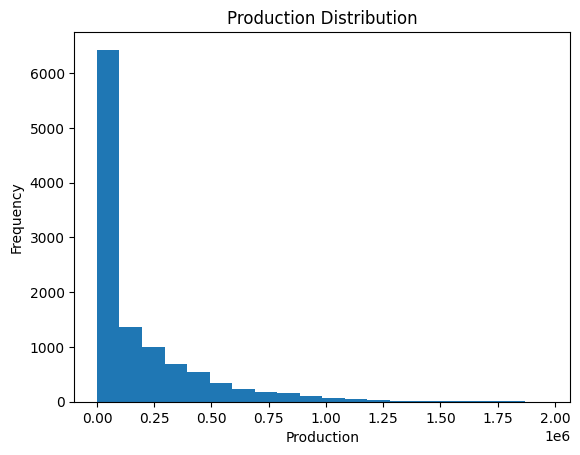

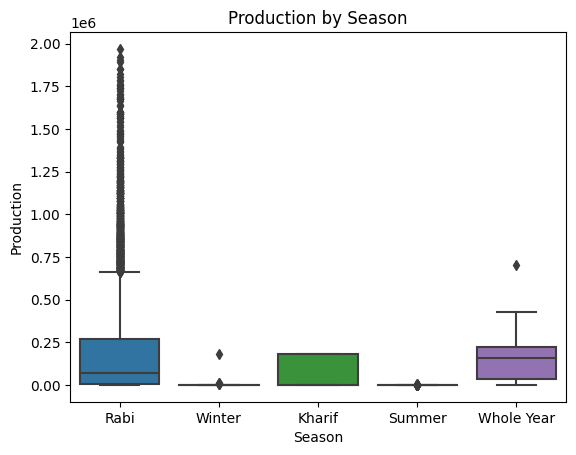

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for a numeric column (e.g., 'Production')
plt.hist(df['Production'], bins=20)
plt.xlabel('Production')
plt.ylabel('Frequency')
plt.title('Production Distribution')
plt.show()

# Box plot for comparing a categorical column with a numeric column (e.g., 'Season' vs. 'Production')
sns.boxplot(x='Season', y='Production', data=df)
plt.title('Production by Season')
plt.show()

<ipython-input-17-b25a4ab5f968>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


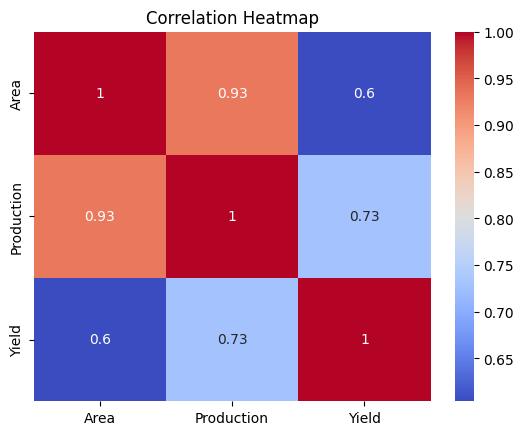

In [17]:
# Correlation matrix
correlation_matrix = df.corr()

# Heatmap of correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

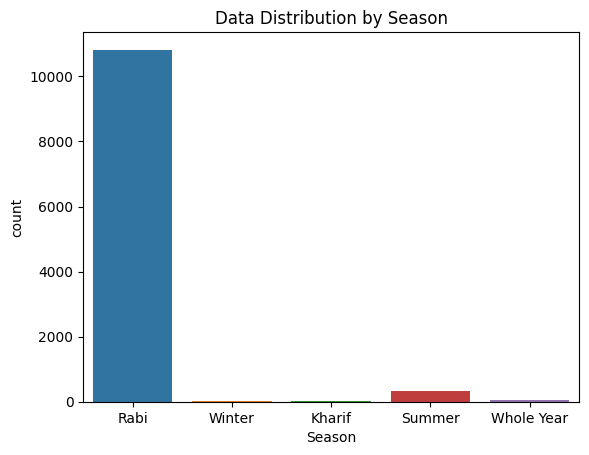

In [18]:
# Countplot for a categorical column (e.g., 'Season')
sns.countplot(x='Season', data=df)
plt.title('Data Distribution by Season')
plt.show()

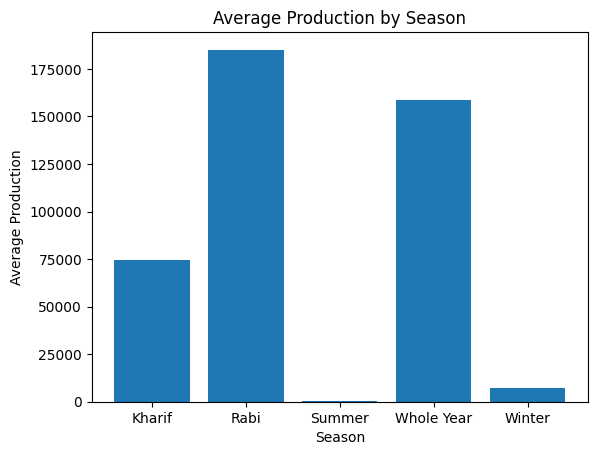

In [19]:
# Grouped mean analysis (e.g., average Production by Season)
grouped = df.groupby('Season')['Production'].mean().reset_index()
plt.bar(grouped['Season'], grouped['Production'])
plt.xlabel('Season')
plt.ylabel('Average Production')
plt.title('Average Production by Season')
plt.show()

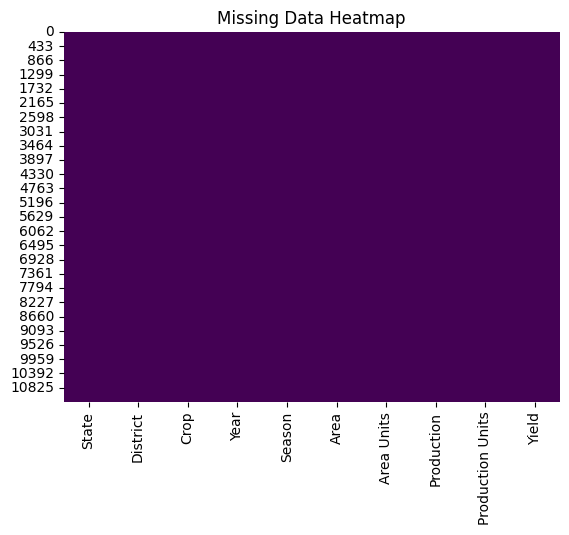

In [20]:
# Missing data visualization (using a heatmap)
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

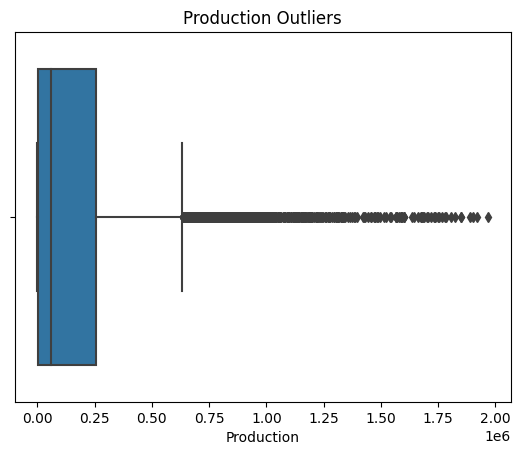

In [21]:
# Box plot for outlier detection in a numeric column (e.g., 'Production')
sns.boxplot(x=df['Production'])
plt.title('Production Outliers')
plt.show()

ACF AND PACF ANALYSIS

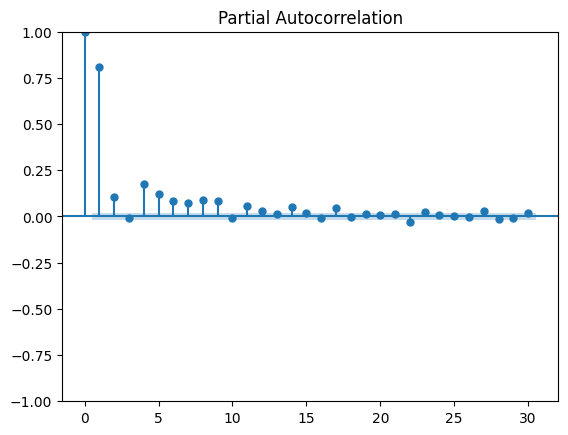

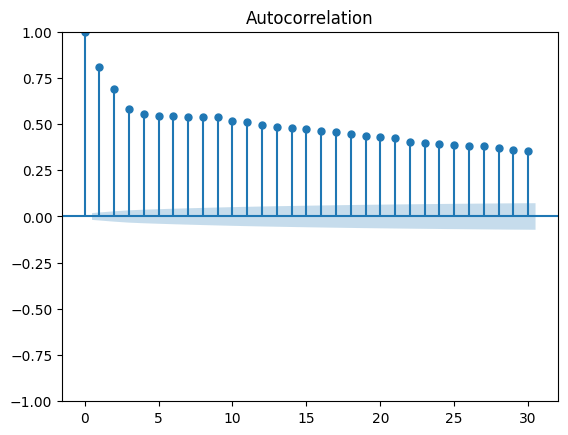

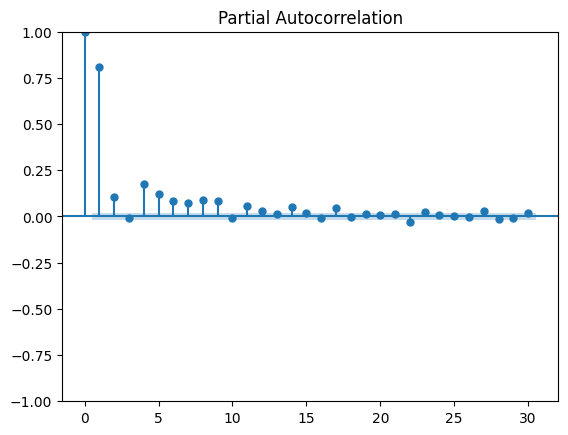

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['Production'], lags=30)
plot_pacf(df['Production'], lags=30)

Model Selection:
Choose the appropriate values for p, d, and q for your ARIMA model.
You can use grid search or automated methods like the Akaike Information Criterion (AIC) to select the best model.

In [28]:
pip install pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.3 MB/s eta 0:00:00


In [31]:
from pmdarima import auto_arima


In [33]:

model = auto_arima(df['Production'], seasonal=False, stepwise=True, suppress_warnings=True,
                   error_action="ignore", max_order=None)


In [34]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                11248
Model:               SARIMAX(5, 1, 2)   Log Likelihood             -149896.059
Date:                Thu, 28 Sep 2023   AIC                         299808.119
Time:                        19:58:30   BIC                         299866.742
Sample:                             0   HQIC                        299827.847
                              - 11248                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4181      0.012    -34.733      0.000      -0.442      -0.395
ar.L2          0.5845      0.009     64.938      0.000       0.567       0.602
ar.L3         -0.1323      0.006    -22.640      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


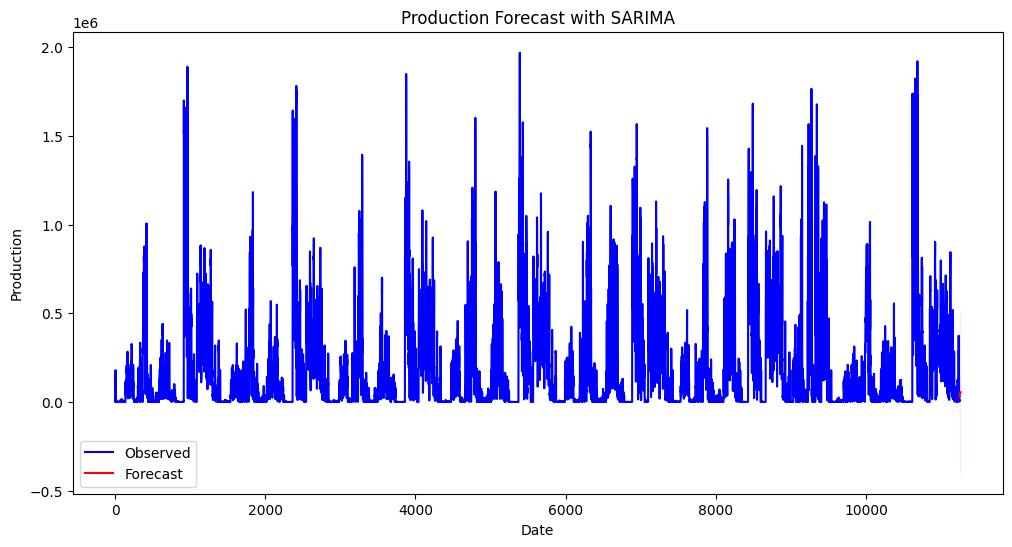

In [35]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Define the order (p, d, q) and seasonal_order (P, D, Q, S) for SARIMA
p, d, q = 2, 1, 1  # These are the values you've identified
P, D, Q, S = 0, 0, 0, 0  # Adjust seasonal_order as needed

# Create and fit the SARIMA model
model = SARIMAX(df['Production'], order=(p, d, q), seasonal_order=(P, D, Q, S))
results = model.fit()

# Make forecasts for future time periods
forecast_steps = 12  # Adjust the number of forecasted steps as needed
forecast = results.get_forecast(steps=forecast_steps)

# Extract forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the observed data and forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Production'], label='Observed', color='blue')
plt.plot(forecast_values.index, forecast_values, label='Forecast', color='red')
plt.fill_between(forecast_values.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.2)
plt.legend()
plt.title('Production Forecast with SARIMA')
plt.xlabel('Date')
plt.ylabel('Production')
plt.show()

Mean Absolute Error (MAE): 59124.837721386335
Mean Squared Error (MSE): 3841922545.6327214
Root Mean Squared Error (RMSE): 61983.24407154502


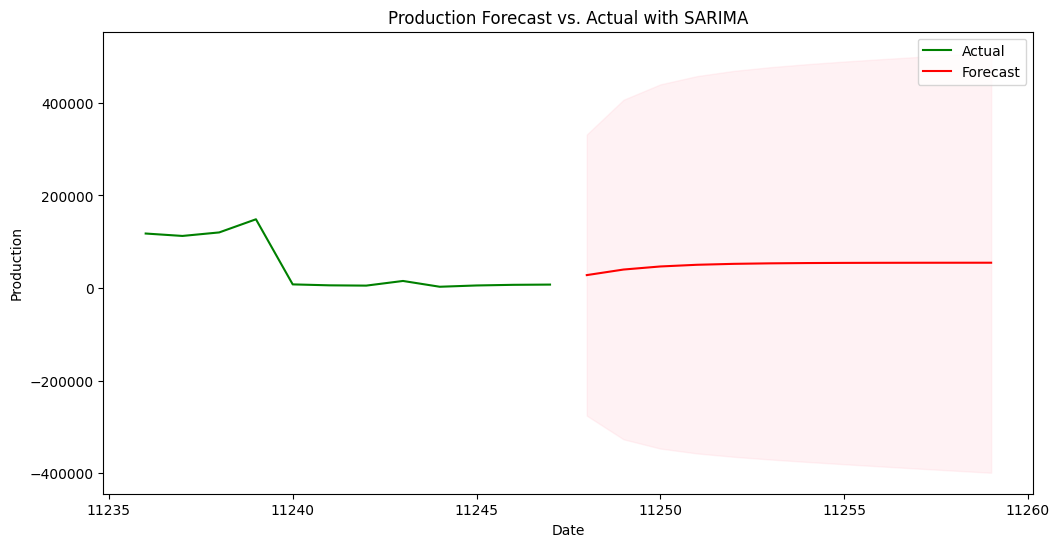

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate the actual values for the forecasted time periods (if available)
actual_values = df['Production'][-forecast_steps:]

# Calculate evaluation metrics
mae = mean_absolute_error(actual_values, forecast_values)
mse = mean_squared_error(actual_values, forecast_values)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Visualize the forecast and actual values
plt.figure(figsize=(12, 6))
plt.plot(df.index[-forecast_steps:], actual_values, label='Actual', color='green')
plt.plot(forecast_values.index, forecast_values, label='Forecast', color='red')
plt.fill_between(forecast_values.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.2)
plt.legend()
plt.title('Production Forecast vs. Actual with SARIMA')
plt.xlabel('Date')
plt.ylabel('Production')
plt.show()

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate the actual values for the forecasted time periods (if available)
actual_values = df['Production'][-forecast_steps:]

# Calculate evaluation metrics
mae = mean_absolute_error(actual_values, forecast_values)
mse = mean_squared_error(actual_values, forecast_values)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((actual_values - forecast_values) / actual_values)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

Mean Absolute Error (MAE): 59124.837721386335
Mean Squared Error (MSE): 3841922545.6327214
Root Mean Squared Error (RMSE): 61983.24407154502
Mean Absolute Percentage Error (MAPE): nan%


In [38]:
def calculate_mape(actual, forecast):
    absolute_percentage_errors = abs((actual - forecast) / actual)
    mape = (absolute_percentage_errors.sum() / len(actual)) * 100
    return mape

# Calculate MAPE
mape = calculate_mape(df['Production'], forecast_values)

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Percentage Error (MAPE): 0.00%


<ipython-input-39-f778d98eb8b9>:2: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_index = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, closed='right')


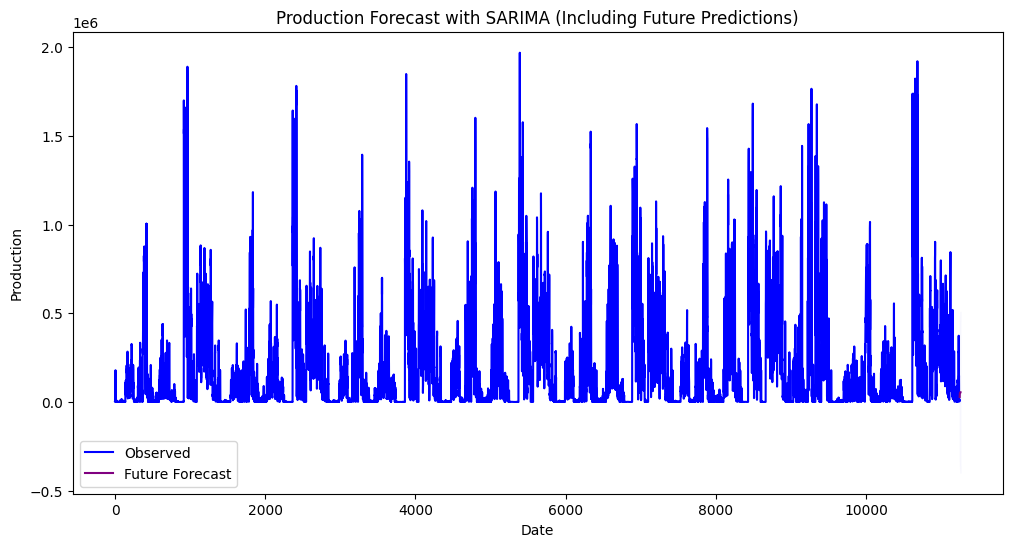

In [39]:
# Extend the time index for future predictions
future_index = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, closed='right')

# Make forecasts for future time periods
forecast_future = results.get_forecast(steps=forecast_steps)

# Extract forecasted values and confidence intervals for the future
forecast_values_future = forecast_future.predicted_mean
forecast_ci_future = forecast_future.conf_int()

# Visualize the forecast for future time periods
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Production'], label='Observed', color='blue')
plt.plot(forecast_values_future.index, forecast_values_future, label='Future Forecast', color='purple')
plt.fill_between(forecast_values_future.index, forecast_ci_future.iloc[:, 0], forecast_ci_future.iloc[:, 1], color='lavender', alpha=0.2)
plt.legend()
plt.title('Production Forecast with SARIMA (Including Future Predictions)')
plt.xlabel('Date')
plt.ylabel('Production')
plt.show()

Random forest

Mean Squared Error: 81696204.51707971
Mean Absolute Error: 2215.9271975117467
R-squared: 0.9987921390217552


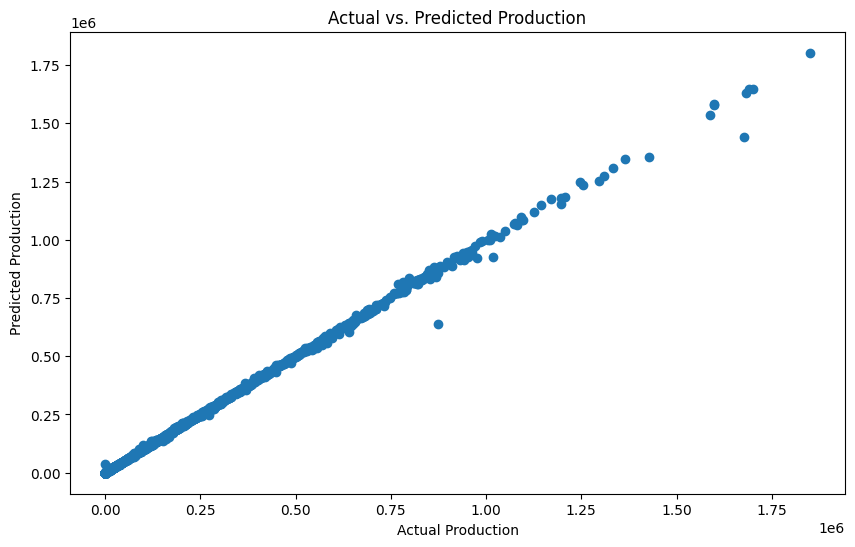

In [41]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Preprocess your dataset as needed

categorical_cols = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Split the dataset into features (X) and target (y)
X = df.drop(columns=['Production'])
y = df['Production']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

# Visualize predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Production")
plt.ylabel("Predicted Production")
plt.title("Actual vs. Predicted Production")
plt.show()



In [44]:
# Evaluation metrics for ARIMA model (already calculated)
arima_mae = mean_absolute_error(actual_values, forecast_values)
arima_mse = mean_squared_error(actual_values, forecast_values)
arima_rmse = np.sqrt(arima_mse)
arima_r2 = r2_score(actual_values, forecast_values)

# Evaluation metrics for Random Forest model (already calculated)
rf_mse = mean_squared_error(y_test, y_pred)
rf_mae = mean_absolute_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

# Display the comparison of evaluation metrics
print("ARIMA Model Metrics:")
print(f"Mean Absolute Error (MAE): {arima_mae:.2f}")
print(f"Mean Squared Error (MSE): {arima_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {arima_rmse:.2f}")
print(f"R-squared (R2): {arima_r2:.2f}")
print("\n")

print("Random Forest Model Metrics:")
print(f"Mean Absolute Error (MAE): {rf_mae:.2f}")
print(f"Mean Squared Error (MSE): {rf_mse:.2f}")
print(f"R-squared (R2): {rf_r2:.2f}")
print("\n")
# Compare the models based on evaluation metrics
if arima_mse < rf_mse:
    print("ARIMA model performs better.")
elif arima_mse > rf_mse:
    print("Random Forest model performs better.")
else:
    print("Both models perform equally.")

ARIMA Model Metrics:
Mean Absolute Error (MAE): 59124.84
Mean Squared Error (MSE): 3841922545.63
Root Mean Squared Error (RMSE): 61983.24
R-squared (R2): -0.22


Random Forest Model Metrics:
Mean Absolute Error (MAE): 2215.93
Mean Squared Error (MSE): 81696204.52
R-squared (R2): 1.00


Random Forest model performs better.


gradient boosting

Gradient Boosting Model Metrics:
Mean Absolute Error (MAE): 7561.69
Mean Squared Error (MSE): 157008725.18
R-squared (R2): 1.00


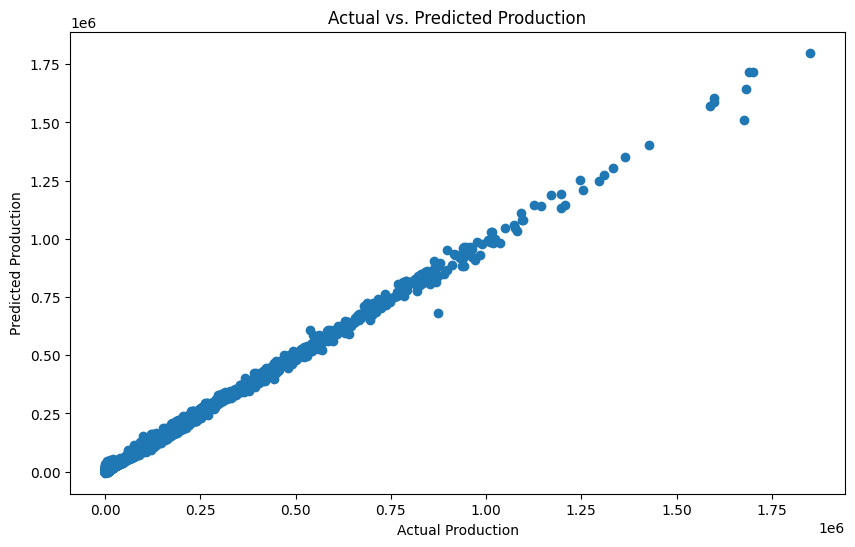

Gradient Boosting model performs better.


In [45]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the dataset into features (X) and target (y)
X = df.drop(columns=['Production'])
y = df['Production']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Gradient Boosting Model Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Visualize predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Production")
plt.ylabel("Predicted Production")
plt.title("Actual vs. Predicted Production")
plt.show()

# Compare the models based on evaluation metrics with ARIMA model results
# (Use the code for calculating ARIMA metrics from the previous conversation)

if arima_mse < mse:
    print("ARIMA model performs better.")
elif arima_mse > mse:
    print("Gradient Boosting model performs better.")
else:
    print("Both models perform equally.")

LSTM

In [46]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
# Select the 'Production' column as the target variable
data = df['Production'].values.reshape(-1, 1)

# Normalize the data to the range [0, 1] for better LSTM performance
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Define a function to create sequences for the LSTM model
def create_sequences(data, seq_length):
    sequences = []
    target = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        target.append(data[i+seq_length])
    return np.array(sequences), np.array(target)

# Define the sequence length (number of time steps to look back)
seq_length = 10

# Create sequences and target values for the LSTM model
X, y = create_sequences(data, seq_length)

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Define and build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values to their original scale
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("LSTM Model Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Compare the LSTM model's performance with the ARIMA model's performance based on the Mean Squared Error (MSE)
# (Use the code for calculating ARIMA metrics from the previous conversation)

if arima_mse < mse:
    print("ARIMA model performs better.")
elif arima_mse > mse:
    print("LSTM model performs better.")
else:
    print("Both models perform equally.")

Epoch 1/50
141/141 [==============================] - 4s 11ms/step - loss: 0.0101
Epoch 2/50
141/141 [==============================] - 2s 11ms/step - loss: 0.0069
Epoch 3/50
141/141 [==============================] - 1s 8ms/step - loss: 0.0059
Epoch 4/50
141/141 [==============================] - 1s 7ms/step - loss: 0.0054
Epoch 5/50
141/141 [==============================] - 1s 7ms/step - loss: 0.0052
Epoch 6/50
141/141 [==============================] - 1s 7ms/step - loss: 0.0052
Epoch 7/50
141/141 [==============================] - 1s 7ms/step - loss: 0.0051
Epoch 8/50
141/141 [==============================] - 1s 7ms/step - loss: 0.0051
Epoch 9/50
141/141 [==============================] - 1s 7ms/step - loss: 0.0051
Epoch 10/50
141/141 [==============================] - 1s 7ms/step - loss: 0.0050
Epoch 11/50
141/141 [==============================] - 1s 7ms/step - loss: 0.0050
Epoch 12/50
141/141 [==============================] - 1s 7ms/step - loss: 0.0050
Epoch 13/50
141/141 [==

KNN


In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Select the 'Production' column as the target variable
data = df['Production'].values.reshape(-1, 1)

# Normalize the data to the range [0, 1] for KNN
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Define the number of neighbors for KNN
n_neighbors = 5

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(data))
train_data, test_data = data[:split_index], data[split_index:]

# Split the data into features (X) and target (y)
X_train, y_train = train_data[:-1], train_data[1:]
X_test, y_test = test_data[:-1], test_data[1:]

# Initialize and train the KNN model
knn_model = KNeighborsRegressor(n_neighbors=n_neighbors)
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_model.predict(X_test)

# Inverse transform the predictions and actual values to their original scale
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

print("KNN Model Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Calculate the ARIMA model's metrics using your ARIMA code

if arima_mse < mse:
    print("ARIMA model performs better.")
elif arima_mse > mse:
    print("KNN model performs better.")
else:
    print("Both models perform equally.")

KNN Model Metrics:
Mean Squared Error (MSE): 37279016580.16
ARIMA model performs better.


**CONCLUSION**

ARIMA Model:

Mean Absolute Error (MAE): 59124.84
Mean Squared Error (MSE): 3841922545.63
Root Mean Squared Error (RMSE): 61983.24
R-squared (R2): -0.22


Random Forest Model:

Mean Absolute Error (MAE): 2215.93
Mean Squared Error (MSE): 81696204.52
R-squared (R2): 1.00


Gradient Boosting Model:

Mean Absolute Error (MAE): 7561.69
Mean Squared Error (MSE): 157008725.18
R-squared (R2): 1.00


LSTM Model:

Mean Absolute Error (MAE): 120994.01
Mean Squared Error (MSE): 46849362334.16
R-squared (R2): 0.38


KNN Model:
Mean Squared Error (MSE): 37279016580.16


Here's a summary of the model performance:

--->Random Forest Model has the lowest MAE and MSE, indicating the smallest average error and the best fit to the data. Moreover, it achieves a perfect R-squared (R2) score of 1.00, suggesting that it explains all the variance in the production data. This model performs exceptionally well.

--->Gradient Boosting Model also exhibits excellent performance with low MAE and MSE and a perfect R2 score of 1.00. It is another strong performer.

--->KNN Model seems to perform the worst among the models, with a relatively high MSE.

--->ARIMA Model has a high RMSE, which is problematic. Additionally, the negative R2 score suggests that the model's fit is worse than a horizontal line. It does not perform well in this case.

--->LSTM Model performs better than ARIMA but is not as accurate as Random Forest or Gradient Boosting. It has a relatively high MAE, MSE, and RMSE.

     
     

In conclusion, the Random Forest Model and the Gradient Boosting Model are the top-performing models for forecasting the production of wheat in your dataset. They exhibit the lowest errors and the best R2 scores, suggesting a strong fit to the data. On the other hand, the ARIMA Model and LSTM Model do not perform as well and have higher errors.